<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)_Lec03_KNN%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생선 분류 문제

## 데이터 준비하기



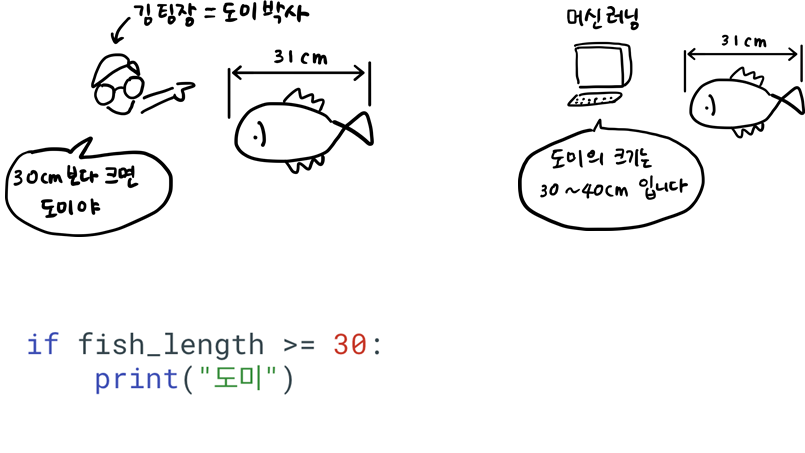

### 도미 데이터 준비하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

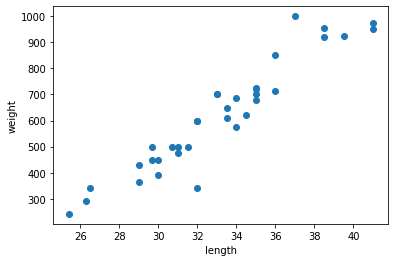

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 준비하기

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

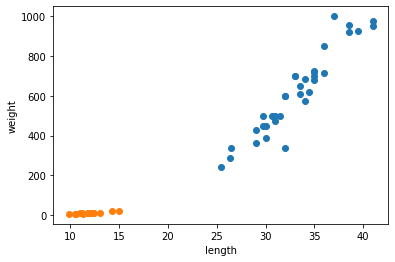

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## KNN (K-Nearest Neighborhood) 모델 생성 - 데이터 분류 전

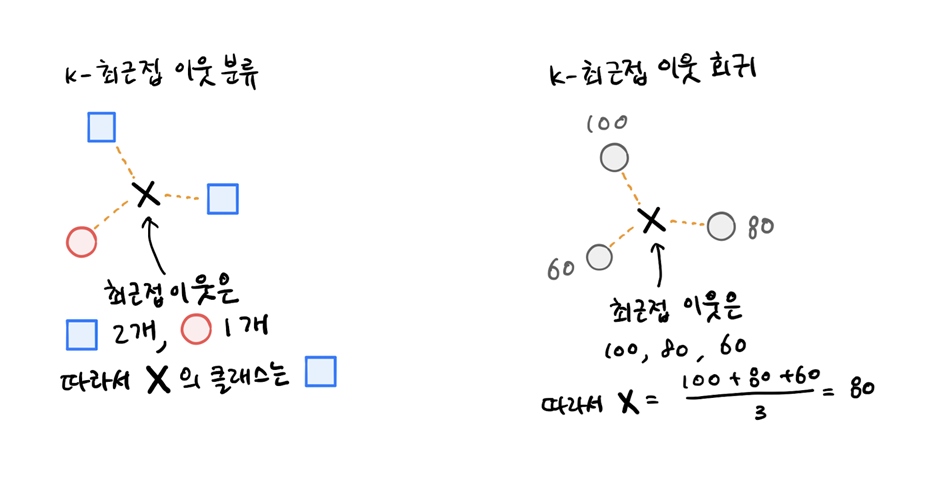

### 데이터 준비하기

In [ ]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight


In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)] #list comprehension

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
fish_target = [1]*35 + [0]*14 # 1 = bream(도미), 0 = smelt(빙어)
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 분류 알고리즘 실행

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
kn.fit(fish_data, fish_target) #학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kn.score(fish_data, fish_target) #학습 데이터 스코어 

1.0

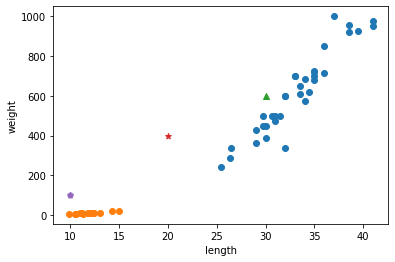

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.scatter(20, 400, marker='*')
plt.scatter(10, 100, marker='p')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.predict([[30, 600], [20, 400], [10, 100]])

array([1, 1, 0])

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
## 참고 데이터를 49개로 한 모델 
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


### [실습 문제]

이웃의 갯수를 5부터 49까지 변경하면서 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수를 구하시오. 

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) #fit - 훈련 

cnt = 0

for n in range(5,50): 
  #이 부분에 코드를 입력하세요. 


  #여기까지. 

print(cnt)

32


## 데이터 분류 - 훈련, 테스트

### numpy로 셔플링된 인덱스 만들기

In [ ]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#index shuffle 
np.random.seed(42)
index = np.arange(49)
print(index)
np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### 훈련데이터와 테스트 데이터로 분리하기 

In [ ]:
#학습 데이터(35개) 만들기 
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0]) #만들어진 첫번째 인덱스의 값 13과 훈련용 데이터의 0번째 인덱스의 값 비교 

[ 32. 340.] [ 32. 340.]


In [ ]:
#테스트 데이터(14개) 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]



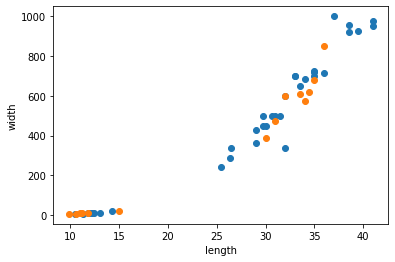

In [ ]:
#산점도로 학습 데이터와 테스트 데이터 분포 확인하기 

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # x=length, y=width
plt.scatter(test_input[:,0], test_input[:,1])

plt.xlabel('length')
plt.ylabel('width')
plt.show()

## KNN (K-Nearest Neighborhood) 모델 생성 - 데이터 분류 후

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 표준화된 데이터 학습하기(by 데이터 전처리)
 - 빙어와 도미의 경계에 근접한 데이터가 들어오면 빙어로 예측할까? 도미로 예측할까?




## 넘파이로 데이터 준비하기
  - 보다 효율적으로 데이터 준비하는 방법

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
# 리스트를 옆으로 붙이기 
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
# Length와 Weight를 옆으로 붙이기
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# 1로 채워진 리스트 5개 만들기 
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
# 타겟 데이터 49개 생성하기 
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #35개는 #14개는 

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기
  - index shuffle 사용할 필요없이 사이킷런의 API 사용하기 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) #train_test default size = 0.25 

In [ ]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
print(test_target)
#빙어와 도미의 클래스 비율이 3 : 10

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# stratify를 사용하여, 클래스 비율에 맞게 데이터 분할하기 
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
#수상한 도미 데이터 - 길이가 25, 무게가 150. 
print(kn.predict([[25, 150]]))

[0.]


In [ ]:
import matplotlib.pyplot as plt

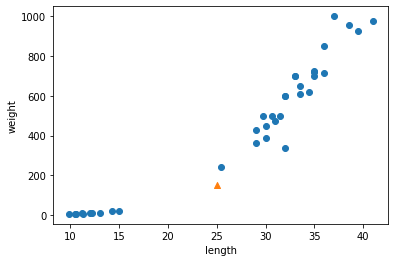

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

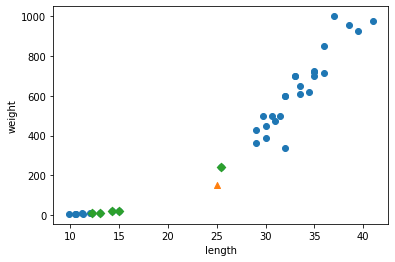

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 데이터 기준을 맞춰라
  - Weight는 단위가 크고, Length는 단위가 작음. 도미와 빙어를 선택할 때 Weight가 상대적으로 큰 영향을 미치게 됨
  - 오분류 발생 가능성 높아짐
  - 두 특성의 스케일이 다르기 때문에 발생하는 문제임. 스케일을 맞추어 분류 정확도를 높일 수 있음   

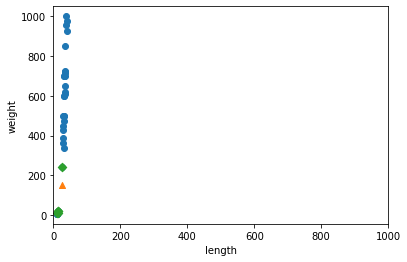

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # X의 기준을 Y의 기준인 0~1000과 맞추어 그래프 그리기. 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#평균과 표준편차 구하기 
#표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄. 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균한 것. 
mean = np.mean(train_input, axis=0) #axis = 0 : 세로축, axis=1 : 가로축 
std = np.std(train_input, axis=0)

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
#표준 스코어 구하기 = 실제 데이터에서 평균을 빼고 표준편차로 나누기
#표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값. 
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


## 전처리 데이터로 모델 훈련하기

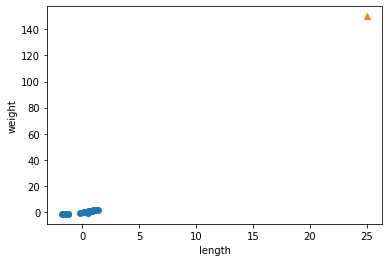

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^') #표준 점수로 변환 전
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 25, 150 데이터를 평균과 표준편차를 이용해서 표준점수로 변환하기 
new = ([25, 150] - mean) / std

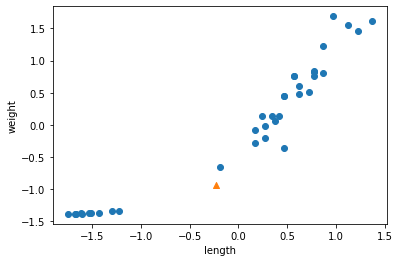

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#표준점수로 변환한 데이터를 훈련시키기 
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#테스트 데이터도 표준점수로 변환하기 
test_scaled = (test_input - mean) / std

In [ ]:
#모델 평가 - 표준점수로 변환한 데이터로 스코어 확인 
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


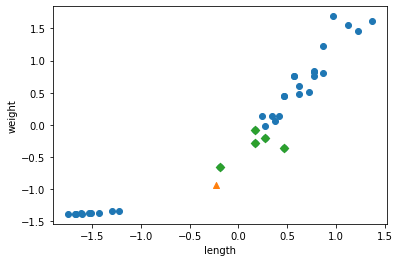

In [ ]:
# 길이 25, 무게 150g인 생선의 최근접 이웃 데이터 그리기 
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## [실습문제 - 암환자 분류하기]

In [ ]:
# 암환자 데이터 불러오기 
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

print(type(breast_cancer_data))
print(breast_cancer_data.data)

<class 'sklearn.utils.Bunch'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
#데이터 확인하기 
import pandas as pd

input_data = pd.DataFrame(breast_cancer_data.data)
input_target = pd.DataFrame(breast_cancer_data.target)

print(input_data.head(5))
print('-----')
print(input_target.head(5))

      0      1       2       3   ...      26      27      28       29
0  17.99  10.38  122.80  1001.0  ...  0.7119  0.2654  0.4601  0.11890
1  20.57  17.77  132.90  1326.0  ...  0.2416  0.1860  0.2750  0.08902
2  19.69  21.25  130.00  1203.0  ...  0.4504  0.2430  0.3613  0.08758
3  11.42  20.38   77.58   386.1  ...  0.6869  0.2575  0.6638  0.17300
4  20.29  14.34  135.10  1297.0  ...  0.4000  0.1625  0.2364  0.07678

[5 rows x 30 columns]
-----
   0
0  0
1  0
2  0
3  0
4  0


In [ ]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [ ]:
print(input_data.describe())

               0           1           2   ...          27          28          29
count  569.000000  569.000000  569.000000  ...  569.000000  569.000000  569.000000
mean    14.127292   19.289649   91.969033  ...    0.114606    0.290076    0.083946
std      3.524049    4.301036   24.298981  ...    0.065732    0.061867    0.018061
min      6.981000    9.710000   43.790000  ...    0.000000    0.156500    0.055040
25%     11.700000   16.170000   75.170000  ...    0.064930    0.250400    0.071460
50%     13.370000   18.840000   86.240000  ...    0.099930    0.282200    0.080040
75%     15.780000   21.800000  104.100000  ...    0.161400    0.317900    0.092080
max     28.110000   39.280000  188.500000  ...    0.291000    0.663800    0.207500

[8 rows x 30 columns]


In [ ]:
#값의 차이가 너무 남. 정규화하기 
#최소 최대 정규화 하기 

#min-max normalized function 
def min_max_normalize(lst): 
  normalized = []

  for value in lst: 
    normalized_num = (value-min(lst))/(max(lst)-min(lst))
    normalized.append(normalized_num)

  return normalized


for x in range(len(input_data.columns)): 
  input_data[x] = min_max_normalize(input_data[x])

input_data.describe()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1]:
#문제1. 데이터(input_data)를 train과 test로 분류한 후 그 길이를 화면에 출력합니다. 이때 test 데이터의 비율을 20%로 정의합니다. random_state는 42로 정의합니다. 


In [2]:
#문제2. KNN 모델을 생성합니다. 이때 K의 값은 5로 지정합니다. 


In [3]:
#문제3. 모델을 학습시킵니다. 


In [4]:
#문제4. 모델의 정확도를 평가합니다. 학습데이터의 정확도와 테스트 데이터의 정확도를 각각 평가하여 화면에 출력합니다. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

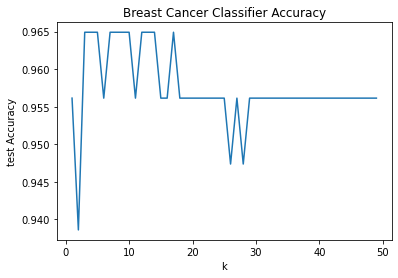

In [ ]:
# 적절한 K값을 찾기 
import matplotlib.pyplot as plt
k_list = range(1,50)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(train_data, train_target)
  accuracies.append(classifier.score(test_data, test_target))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("test Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()